In [5]:
import numpy as np
import random
import pymc3 as pm
import arviz as az
from matplotlib import pyplot as plt

In [3]:
n = 20
p = 0.3
dataset = np.random.binomial(n, p)
dataset = [1] * dataset + [0] * (n - dataset)
random.shuffle(dataset)
print(dataset)
print(sum(dataset))

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
5


In [4]:
bern_model = pm.Model()
with bern_model:
    theta = pm.Beta('theta', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=theta, observed=dataset)
    trace = pm.sample(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


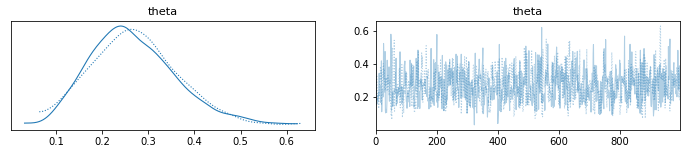

In [6]:
with bern_model:
    az.plot_trace(trace)

In [12]:
with bern_model:
    theta = trace['theta']

sample_h = [random.random() < t for t in theta]
print(sum(sample_h)/len(sample_h))

0.27


In [13]:
print(np.median(theta))

0.259838900066318


In [14]:
print(np.mean(theta))

0.26803431257327065


In [16]:
print(np.var(theta))

0.00850298694255088


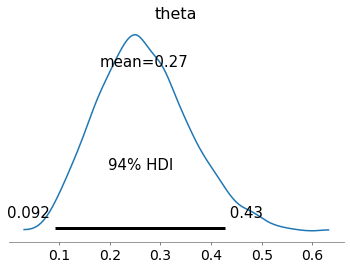

In [18]:
from scipy.stats import beta

theta_mean = np.mean(trace['theta'])
n = len(trace['theta'])

posterior = beta(n*theta_mean + 1, n*(theta_mean - 1))
lin = np.linspace(0, 1, 100)

with bern_model:
    az.plot_posterior(trace)
    plt.plot(lin, posterior.pdf(lin))

In [19]:
draws = np.random.normal(0, 1,size=100)
print(draws)

[-0.11310757  1.74957741 -0.49916372  0.26752939 -0.55036875  0.04219579
 -0.93506798  0.21118171 -1.62213328 -0.18260313  1.52255896 -0.26597084
  0.59363343  1.40500759  1.29688901 -1.96486422 -0.94125952  0.26384357
  0.51447354  1.60528665  0.34995671 -0.49283337 -0.54536842  1.5001848
  0.08974959  1.73494879 -0.75259502 -1.34006918  1.72509883  0.55514387
 -1.13818115  1.01898922 -1.13311203 -0.4898336   0.45154422 -1.73971352
 -1.21214382 -0.70940166 -0.36484669 -0.43817472  0.16778107 -1.61663895
 -1.37422384  0.09229792 -0.21541188 -0.16223805 -0.64952942  0.60276434
 -0.11180756  0.70827193  1.25368479  0.5060162   0.6323343  -1.43242484
 -1.25958339 -1.20789249  0.30925679 -0.86562709 -0.71935956 -0.05781428
 -0.00983005  0.86621461 -0.18469935 -1.81577831 -1.89925006  0.41956958
 -1.00785011 -0.61770447 -0.8371067  -1.47684094 -0.22770654 -1.3351093
  0.20503461  1.31079628 -0.33284931 -0.2559996   0.30718962 -1.59009496
 -0.3207028  -0.27224693  0.30180211  0.42285549 -0.0

In [21]:
epsilon = np.random.normal(0, .25**.5, size=100)
print(epsilon)

[ 0.02850904  0.20319022 -0.20747617 -0.09323192 -0.01070719  0.04850371
 -0.18701302 -0.80240366 -0.14801847 -0.08376197 -0.94332731  0.01450547
 -0.00824775  0.12371519  0.20965623  0.39338956 -0.08393817 -0.52348167
 -0.01435267  0.14393319 -0.017236    0.2550374   0.45632322 -0.06909411
  0.80543838  0.6021435  -0.09414079  0.3602097   0.56952608  0.51040724
  0.70492046  0.64557036 -0.14713974 -0.04364741  0.06006812 -0.53652171
  0.29469663 -0.30048174 -0.43327057 -0.18105513  0.00336121 -0.15006319
  0.25691133  0.26095691 -0.57629291  0.04380277 -0.10334991  0.1536457
 -0.67297793 -0.12819524  0.0483226   0.48748285  1.13889718 -0.17270324
  0.07627129  0.35113607  0.14373086 -0.58474772  0.63258863  0.17698012
  0.83249161 -0.11081884 -0.29255819  0.33556377  0.73726561  0.85445582
  0.15604297 -0.48605351  0.10197722 -0.09067918 -0.54436501 -0.41142985
 -0.07277214  0.03030443  0.20478278 -0.06722668 -0.55887566 -0.16386282
  0.84483108 -0.35584443  0.03418104 -0.5154603  -0.

In [25]:
y = lambda x, eps: 2.5 + 0.9 * x + eps
dataset = np.array([[d, y(d, epsilon[i])] for i, d in enumerate(draws)])
print(dataset)

[[-0.11310757  2.42671222]
 [ 1.74957741  4.27780989]
 [-0.49916372  1.84327647]
 [ 0.26752939  2.64754453]
 [-0.55036875  1.99396094]
 [ 0.04219579  2.58647992]
 [-0.93506798  1.4714258 ]
 [ 0.21118171  1.88765989]
 [-1.62213328  0.89206157]
 [-0.18260313  2.25189521]
 [ 1.52255896  2.92697576]
 [-0.26597084  2.27513172]
 [ 0.59363343  3.02602234]
 [ 1.40500759  3.88822202]
 [ 1.29688901  3.87685634]
 [-1.96486422  1.12501176]
 [-0.94125952  1.56892826]
 [ 0.26384357  2.21397754]
 [ 0.51447354  2.94867352]
 [ 1.60528665  4.08869117]
 [ 0.34995671  2.79772505]
 [-0.49283337  2.31148737]
 [-0.54536842  2.46549164]
 [ 1.5001848   3.78107221]
 [ 0.08974959  3.38621301]
 [ 1.73494879  4.66359741]
 [-0.75259502  1.72852369]
 [-1.34006918  1.65414743]
 [ 1.72509883  4.62211503]
 [ 0.55514387  3.51003672]
 [-1.13818115  2.18055743]
 [ 1.01898922  4.06266066]
 [-1.13311203  1.33305943]
 [-0.4898336   2.01550236]
 [ 0.45154422  2.96645792]
 [-1.73971352  0.39773612]
 [-1.21214382  1.70376719]
 

In [28]:
x = dataset[:, 0]
y = dataset[:, 1]

with pm.Model() as model:
    a = pm.Normal('a', mu=0, sd=10)
    b = pm.Normal('b', mu=0, sd=1)
    sigma = pm.HalfCauchy('sigma', 5)
    mu = a + b * x
    y_pred = pm.Normal('y_pred', mu=mu, sd=sigma, observed=y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b, a]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.


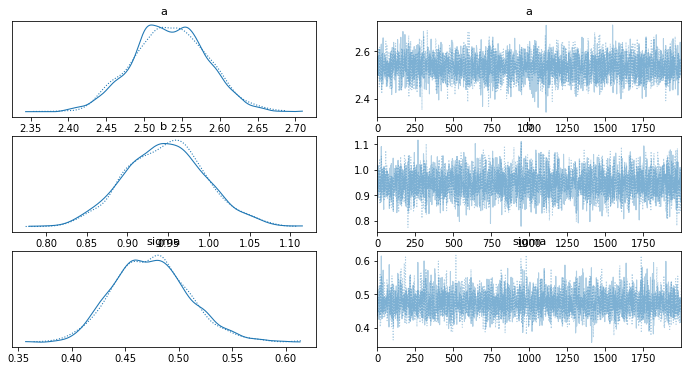

In [29]:
with model:
    trace = pm.sample(2000, tune=1000)
    az.plot_trace(trace)

2.533939442380086
0.9467386266067315


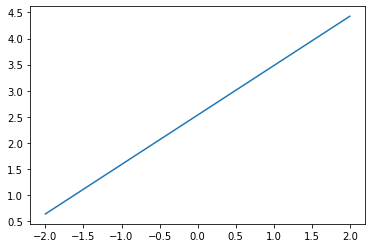

In [41]:
a_mean = np.mean(trace['a'])
b_mean = np.mean(trace['b'])

print(a_mean)
print(b_mean)

line = lambda t: t*b_mean + a_mean
lin = np.linspace(-2, 2, 200)
plt.plot(lin, [line(l) for l in lin])
plt.show()

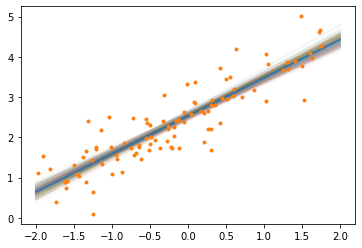

In [43]:
a_vals = list(trace['a'])
b_vals = list(trace['b'])
random.shuffle(a_vals)
random.shuffle(b_vals)

n = 200
a_sample = a_vals[:n]
b_sample = b_vals[:n]

line = lambda t, b, a: t*b + a

for i in range(n):
    a = a_sample[i]
    b = b_sample[i]
    plt.plot(lin, [line(l, b, a) for l in lin], alpha=.05)

line = lambda t: t*b_mean + a_mean
plt.plot(lin, [line(l) for l in lin])
plt.plot(x, y,'.')
plt.show()